## 对于一组电影数据，希望统计电影分类(genre)的情况，应该如何处理数据？
> 思路：重构一个全为`0`的数据，列名为分类，如果某一条数据中分类出现过，就让`0`变为`1`

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
filename = 'data/IMDB-Movie-Data.csv'
df = pd.read_csv(filename)

In [7]:
# 统计分类的列表
temp_list = df['Genre'].str.split(",").tolist()   # 列表嵌套列表
genre_list = list(set([i for j in temp_list for i in j]))     # 合并成一个大列表并去重

In [13]:
# 构造全为 0 的数组
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)

In [19]:
# 给每个电影出现分类的位置赋值 1
for i in range(df.shape[0]):
    # zeros_df.loc[0, ['Sci-Fi', 'Mucical']] = 1
    zeros_df.loc[i, temp_list[i]] = 1
    
zeros_df.head(3)

,Drama,Family,Animation,Music,Biography,Western,Romance,Musical,Fantasy,Sport,Thriller,Crime,Action,Sci-Fi,Adventure,Horror,History,Mystery,Comedy,War
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
# 统计每个分类的电影的数量和
genre_count = zeros_df.sum(axis=0)
genre_count

Drama        513.0
Family        51.0
Animation     49.0
Music         16.0
Biography     81.0
Western        7.0
Romance      141.0
Musical        5.0
Fantasy      101.0
Sport         18.0
Thriller     195.0
Crime        150.0
Action       303.0
Sci-Fi       120.0
Adventure    259.0
Horror       119.0
History       29.0
Mystery      106.0
Comedy       279.0
War           13.0
dtype: float64

In [23]:
# 排序
genre_count = genre_count.sort_values()
genre_count

Musical        5.0
Western        7.0
War           13.0
Music         16.0
Sport         18.0
History       29.0
Animation     49.0
Family        51.0
Biography     81.0
Fantasy      101.0
Mystery      106.0
Horror       119.0
Sci-Fi       120.0
Romance      141.0
Crime        150.0
Thriller     195.0
Adventure    259.0
Comedy       279.0
Action       303.0
Drama        513.0
dtype: float64

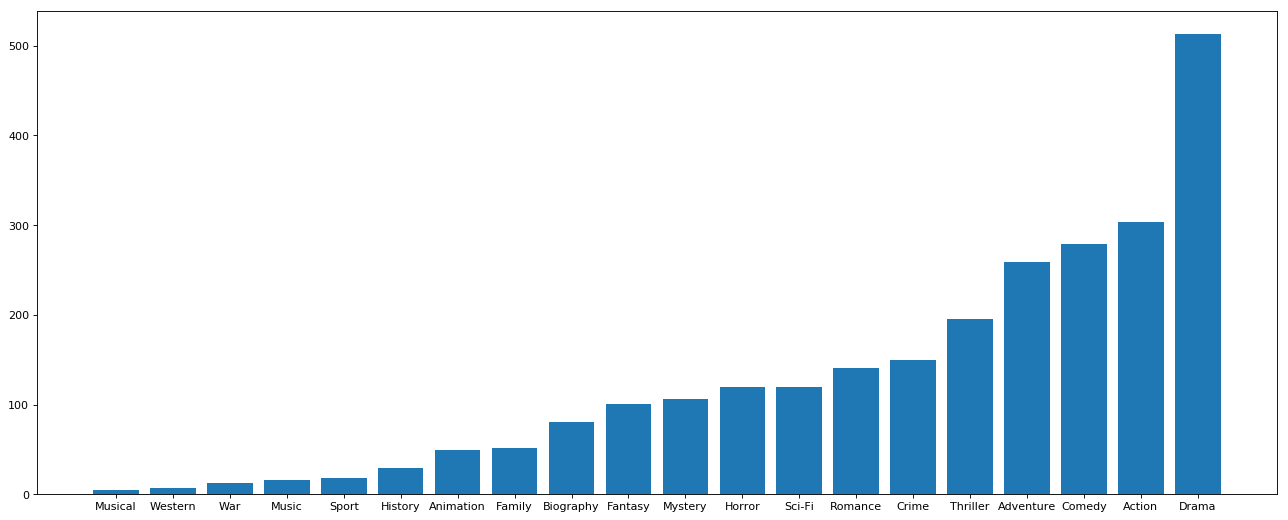

In [24]:
# 画图
_x = genre_count.index
_y = genre_count.values

plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y)
plt.xticks(range(len(_x)), _x)
plt.show()

## 有一组关于全球星巴克店铺的统计数据，现在想知道美国的星巴克数量和中国的哪个多，或者是说中国每个省份星巴克的数量情况，如何统计？

In [25]:
filename = 'data/starbucks.csv'
df = pd.read_csv(filename)
df.head(1)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51


### 在 pandas 中类似的分组的操作可以通过 groupby 实现
```python
grouped = df.groupby(by = 'columns_name')   # <pandas.core.groupby.groupby.DataFrameGroupBy object>
```
+ `grouped` 是一个`DataFrameGroupBy`对象，是可迭代的  
+ `grouped` 中的每一个元素是一个元组，元组里面是（索引`(分组的值)`, 分组之后的`DataFrame`）

In [28]:
# 分组
grouped = df.groupby(by = 'Country')

In [30]:
# 聚合
country_count = grouped['Brand'].count()
country_count['US'], country_count['CN']

(13608, 2734)

In [35]:
# 统计中国每个省店铺的数量
china_data = df[df['Country'] == 'CN']
grouped = china_data.groupby(by = 'State/Province').count()['Brand']
grouped

State/Province
11    236
12     58
13     24
14      8
15      8
21     57
22     13
23     16
31    551
32    354
33    315
34     26
35     75
36     13
37     75
41     21
42     76
43     35
44    333
45     21
46     16
50     41
51    104
52      9
53     24
61     42
62      3
63      3
64      2
91    162
92     13
Name: Brand, dtype: int64